In [1]:

import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm, datasets, metrics
from sklearn.metrics import auc, roc_auc_score, roc_curve, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import StandardScaler

from imblearn.combine import *
from imblearn.over_sampling import *


## Trainset

In [2]:
df= pd.read_csv('Train_df.csv')
df = df.astype(np.float64)

In [3]:
df

,0,1,2,3,4,5,6,7,8,9,...,1023,MW,ALOGP,HBA,HBD,PSA,ROTB,AROM,ALERTS,toxicity
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.769322,-0.669915,-0.019260,0.733783,0.213807,-0.463486,-0.413353,-0.009528,1.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,-0.022689,0.682386,-0.266282,-0.435030,-0.237935,-0.034662,1.400988,-0.009528,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,-0.450835,-0.214675,-0.513305,-0.824635,-0.418376,-0.892310,-0.413353,-0.897540,1.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.266304,0.465546,0.227762,-0.824635,-0.359040,0.179750,0.493817,-0.009528,1.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.478688,-1.225306,0.227762,0.733783,0.320815,-0.677898,-0.413353,-0.897540,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1393,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,3.601285,-2.526262,2.697986,4.240223,4.495807,2.967107,0.493817,2.654509,0.0
1394,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.958710,-0.825128,3.439053,2.681805,2.500453,1.037399,-1.320523,0.878484,0.0
1395,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.102378,0.773643,0.968830,-0.435030,0.274936,0.394162,1.400988,-0.009528,0.0
1396,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.990976,1.782411,-0.266282,-0.824635,-0.359040,2.109459,0.493817,0.878484,0.0


In [4]:
x_train = df.iloc[:,:1032]
y_train = df['toxicity']

## Testset

In [5]:
test = pd.read_csv('Test_df.csv')
test = test.astype(np.float64)
test

,0,1,2,3,4,5,6,7,8,9,...,1023,MW,ALOGP,HBA,HBD,PSA,ROTB,AROM,ALERTS,toxicity
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.031682,-0.078206,0.124693,-0.070660,0.065800,-0.124521,0.271724,1.806079,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.372504,0.310100,-0.362862,-0.288668,-0.316390,-0.396949,0.271724,-0.882223,1.0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.197573,0.416506,0.514738,0.147348,0.548903,0.365849,-1.181759,0.013878,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.359417,0.502600,-0.362862,-0.288668,-0.322430,-0.233492,0.271724,-0.882223,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.391879,-0.475822,-0.167840,-0.179664,-0.065423,-0.342464,-0.455017,0.013878,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.015372,-0.448783,0.417227,0.365357,0.327722,0.093421,0.271724,0.013878,0.0
448,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.054410,-1.006187,0.417227,0.147348,0.284919,0.038936,0.271724,0.013878,0.0
449,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.103049,-0.068065,0.417227,0.147348,0.200175,-0.233492,0.998466,0.013878,0.0
450,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.749251,-0.122274,1.099804,0.910377,0.731408,-0.287978,-1.181759,0.013878,0.0


In [6]:
x_test = test.iloc[:,:1032]
y_test = test['toxicity']

In [7]:
# # train validation set 나누기


# x_train, x_val, y_train,y_val = train_test_split(x_df,y_df,train_size=0.8, random_state=42)


# print(y_train.value_counts())
# print(y_val.value_counts())

# Parameter tuning

In [8]:
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix, precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

lgb = lgb.LGBMClassifier()
parameters = {'num_leaves':[20,40,60,80,100], 'min_child_samples':[5,10,15],'max_depth':[3,5,10],
             'learning_rate':[0.05,0.1,0.2],'n_estimators':[10,30,50,70,90]}
lgbm = RandomizedSearchCV(lgb,parameters,n_iter=50, cv=10, refit=True, return_train_score=True)
lgbm.fit(X=x_train, y=y_train)
print(lgbm.best_params_)


{'num_leaves': 60, 'n_estimators': 30, 'min_child_samples': 10, 'max_depth': 10, 'learning_rate': 0.1}


In [9]:
scores_df = pd.DataFrame(lgbm.cv_results_)
scores_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_num_leaves,param_n_estimators,param_min_child_samples,param_max_depth,param_learning_rate,params,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.109524,0.006962,0.007802,3.998281e-04,80,50,15,5,0.1,"{'num_leaves': 80, 'n_estimators': 50, 'min_ch...",...,0.856121,0.856121,0.851351,0.855326,0.861685,0.864070,0.852264,0.871326,0.857892,0.005873
1,0.128929,0.003506,0.007602,4.897653e-04,60,70,5,5,0.1,"{'num_leaves': 60, 'n_estimators': 70, 'min_ch...",...,0.938792,0.939587,0.942766,0.932432,0.933227,0.928458,0.930103,0.953932,0.936257,0.007340
2,0.157784,0.018992,0.007953,4.710609e-04,100,50,10,10,0.2,"{'num_leaves': 100, 'n_estimators': 50, 'min_c...",...,0.992846,0.993641,0.997615,0.989666,0.993641,0.992051,0.991263,0.993646,0.992847,0.002011
3,0.225651,0.016522,0.007802,5.999487e-04,60,70,5,10,0.05,"{'num_leaves': 60, 'n_estimators': 70, 'min_ch...",...,0.981717,0.976948,0.983307,0.979332,0.973768,0.977742,0.980143,0.985703,0.979414,0.003289
4,0.087920,0.002845,0.007502,5.001784e-04,20,10,10,5,0.1,"{'num_leaves': 20, 'n_estimators': 10, 'min_ch...",...,0.769475,0.784579,0.780604,0.780604,0.780604,0.759936,0.761716,0.772041,0.773169,0.009956
5,0.160336,0.017764,0.007902,5.385129e-04,100,50,15,10,0.05,"{'num_leaves': 100, 'n_estimators': 50, 'min_c...",...,0.906995,0.905405,0.908585,0.891892,0.902226,0.910970,0.898332,0.898332,0.903355,0.005529
6,0.109825,0.002040,0.007802,4.001023e-04,80,90,5,3,0.05,"{'num_leaves': 80, 'n_estimators': 90, 'min_ch...",...,0.819555,0.816375,0.820350,0.805246,0.809221,0.814785,0.800635,0.814932,0.810205,0.008118
7,0.133129,0.011889,0.007902,3.000261e-04,20,50,5,10,0.1,"{'num_leaves': 20, 'n_estimators': 50, 'min_ch...",...,0.948331,0.946741,0.946741,0.948331,0.939587,0.945151,0.949166,0.949166,0.947067,0.003047
8,0.151734,0.012201,0.007502,5.001784e-04,100,90,5,5,0.05,"{'num_leaves': 100, 'n_estimators': 90, 'min_c...",...,0.907790,0.910970,0.906995,0.887122,0.900636,0.910970,0.897538,0.900715,0.902242,0.006959
9,0.094021,0.004981,0.007702,6.402363e-04,100,10,10,5,0.05,"{'num_leaves': 100, 'n_estimators': 10, 'min_c...",...,0.706677,0.734499,0.734499,0.707472,0.705087,0.701908,0.691819,0.710087,0.708951,0.013939


In [10]:
import lightgbm as lgb
from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix, precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

lgbm = lgb.LGBMClassifier(num_leaves= 60, min_child_samples= 10, 
                          max_depth= 10, learning_rate= 0.1, random_state=50, n_estimators=30)
lgbm.fit(X=x_train, y=y_train)

y_pred = lgbm.predict(x_test)
y_pred_proba = lgbm.predict_proba(x_test)[:,1]


pred_train = lgbm.predict(x_train)
train_score = accuracy_score(y_train,pred_train)


Precision = precision_score(y_test, y_pred)
Recall = recall_score(y_test, y_pred)

print('accuracy : {0}'.format(accuracy_score(y_test, y_pred)))
print('Precision : {0}'.format(Precision))
print('Recall : {0}'.format(Recall))
print('ROC_score :', roc_auc_score(y_test, y_pred_proba))

F1_score = 2*(Precision*Recall)/(Precision+Recall)
print("F1 score : {0}".format(F1_score))

accuracy : 0.8075221238938053
Precision : 0.6995884773662552
Recall : 0.9239130434782609
ROC_score : 0.9248864373783257
F1 score : 0.7962529274004685


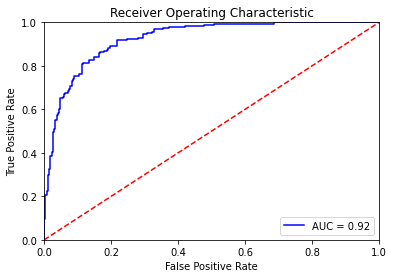

In [11]:
import matplotlib.pyplot as plt

# ROC curve
from sklearn.metrics import roc_auc_score,roc_curve,auc

fpr, tpr, threshold = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

roc = pd.DataFrame({
    'FPR': fpr,
    'TPRate': tpr,
    'Threshold': threshold
})

optimal_idx=np.argmax(tpr-fpr)
optimal_threshold= threshold[optimal_idx]


plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

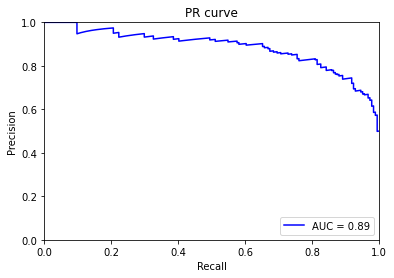

In [12]:
# precision, recall, threshold 생성
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
# pr_auc 정의
pr_auc = auc(recall, precision)
# F1 score 정의
F1 = 2*(precision*recall)/(precision+recall)

plt.title('PR curve')
plt.plot(recall, precision, 'b', label = 'AUC = %0.2f' % pr_auc)
plt.legend(loc = 'lower right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

In [13]:
d_t = pd.DataFrame(y_test)
d_t = d_t.reset_index(drop=True)
d_preds = pd.DataFrame(y_pred_proba)
pred_proba = pd.concat([d_t,d_preds],axis=1)
pred_proba.columns=['toxicity','prediction']
pred_proba.sort_values(by='prediction',ascending=True)

,toxicity,prediction
201,0.0,0.105181
204,0.0,0.107299
221,0.0,0.119520
210,0.0,0.127698
233,0.0,0.130867
...,...,...
169,1.0,0.888929
132,1.0,0.891002
48,1.0,0.901509
27,1.0,0.901781


In [14]:
preds_1d = y_pred_proba.flatten()
pred_class = np.where(preds_1d> optimal_threshold,1,0)

In [15]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

print('idx:',optimal_idx,', threshold:',optimal_threshold )

auc_score = roc_auc_score(y_test, y_pred_proba)
accuracy_score = accuracy_score(y_test,pred_class)
Precision = precision_score(y_test,pred_class)
Recall = recall_score(y_test,pred_class)
print('ROC:',auc_score)
print('ACC:',accuracy_score)
print('Precision : {0}'.format(Precision))
print('Recall : {0}'.format(Recall))
F1_score = 2*(Precision*Recall)/(Precision+Recall)
print("F1 score : {0}".format(F1_score))

idx: 73 , threshold: 0.5191670640753208
ROC: 0.9248864373783257
ACC: 0.8362831858407079
Precision : 0.7433628318584071
Recall : 0.9130434782608695
F1 score : 0.8195121951219514


In [16]:
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn+fp)
specificity

0.7276119402985075

In [17]:
import joblib 

filename = 'LGBM.pkl'
joblib.dump(lgbm,filename)

['LGBM.pkl']